In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# Load the dataset
df = pd.read_csv('inf.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [3]:
df['Pathogen Test Result'].value_counts()

1    10028
0     8489
Name: Pathogen Test Result, dtype: int64

In [4]:
df.describe()

,Collection Year,Pathogen Test Result,Host Sex,Host Age,Chronic Conditions,Fever,chills,conjunctivitis,cough,diarrhea,...,loss of appetite,malaise,myalgia,nausea,other symptoms,running nose,short breath,throat,vomiting,wheezing
count,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,...,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000,18517.000000
mean,2015.881838,0.541556,0.471405,34.079657,7.982341,0.442944,0.400443,0.230545,0.448615,0.122752,...,0.264676,0.287952,0.268024,0.201545,0.009613,0.323865,0.243182,0.263326,0.173408,0.145326
std,2.855294,0.498284,0.499195,22.497576,11.803348,0.496747,0.490001,0.421193,0.497366,0.328161,...,0.441172,0.452821,0.442942,0.401165,0.097575,0.467962,0.429016,0.440449,0.378610,0.352439
min,2006.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.000000,1.000000,51.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,1.000000,1.000000,97.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Split the data into features and target variable
X = df.drop(['Pathogen Test Result'],axis = 1)
Y = df['Pathogen Test Result']

In [6]:
# Split the data into training and testing sets
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size= 0.3, random_state=2)

In [7]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [8]:
# Train the model on the training set
classifier = SVC(kernel='linear', random_state=2)  
classifier.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=2)

In [9]:
# Use the trained model to make predictions on the testing set
y_pred = classifier.predict(X_test)  

In [10]:
cm= confusion_matrix(Y_test, y_pred)  

array([[2022,  539],
       [1091, 1904]], dtype=int64)

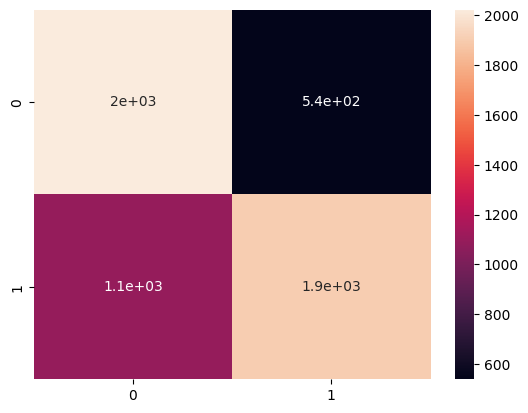

In [11]:
snb.heatmap(cm,annot = True)
cm

In [12]:
score =accuracy_score(Y_test,y_pred)
print('accuracy on testing Data :',round(score*100 ,2),'%')

accuracy on testing Data : 70.66 %


In [13]:
y_pred2 =classifier.predict(X_train)

In [14]:
score2 =accuracy_score(y_pred2, Y_train)
print('accuracy on Training Data :',round(score2*100 ,2),'%')

accuracy on Training Data : 71.1 %


In [15]:
# precision for trainig and testing
print('for testing  : ' , round(precision_score(Y_test , y_pred)*100,2),'%')
print('for training : ' , round(precision_score(Y_train , y_pred2)*100,2),'%')

for testing  :  77.94 %
for training :  78.67 %


In [16]:
# Recall for trainig and testing
print('for testing  : ' , round(recall_score(Y_test , y_pred)*100,2),'%')
print('for training : ' , round(recall_score(Y_train , y_pred2)*100,2),'%')

for testing  :  63.57 %
for training :  64.13 %


In [17]:
# f1_score for trainig and testing
print('for testing  : ' , round(f1_score(Y_test , y_pred)*100,2),'%')
print('for training : ' , round(f1_score(Y_train , y_pred2)*100,2),'%')

for testing  :  70.03 %
for training :  70.66 %


In [18]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [19]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  78.95 %


In [20]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  63.57 %


In [21]:
#ROC and AUC
fpr, tpr, threshold = roc_curve(Y_test,y_pred)
roc_auc = auc(fpr, tpr)

In [22]:
print('Area under curve : ',round(roc_auc*100,2),'%')

Area under curve :  71.26 %


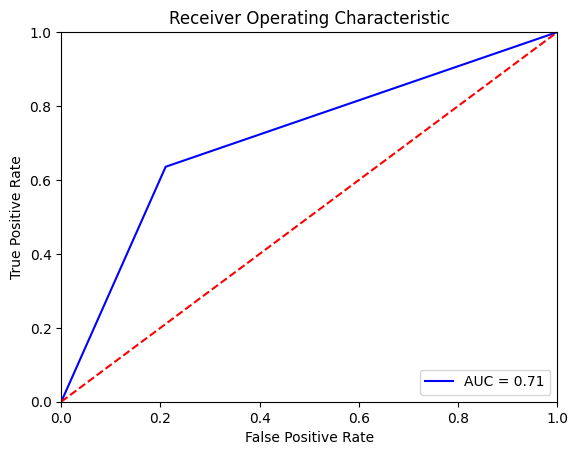

In [23]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()